# World University Rankings 2023 #

## STAT 301 Group Project 

### Data Description

The World Univeristy Ranking 2023 dataset conatains data about 1,799 universities across the 104 countries. Based on analysis of over 121 million citations across over 15 million research publications and from results of over 40,000 survey responses from global scholars, 13 calibrated performance indicators were included in this dataset. The 13 performance indicators measure an institutions performance on 4 categories: teaching, research, knowledge transfer and international outlook. 

The 13 performance indicators are: 
- University Rank
- Name of University
- Location
- No of student
- No of student per staff
- International Student
- Female:Male Ratio
- OverAll Score
- Teaching Score
- Research Score
- Citations Score
- Industry Income Score
- International Outlook Score

As seen above, most of the performance indicators are quantatative variables while a few are categroical variables. Overall, there are about 680,000 observations collected across 2,500 different institutions that submited data.

### Question

**Question: How does the female to male ratio and proportion international student affect the overall score for the university?** 

Using the column, Female:Male Ratio (for female to male ratio) and proportion of international students as the explanatory variables, we will determine how it affects the response variable, which is the OverAll Score column by performing a linear regression model. By performing the linear regression model using the data in this dataset, we can obtain estimated coefficients of each explanatory variable, allowing us to examine the impacts of each variable closely. Furthermore, we will be able to obtain the *p*-values which will allow us to determine the significance of each explanatory variable.

Since this question will be focusing primarily on the relationships between the variables and data within the dataset, it is focused on inference.

### Explatory Data Analysis and Visualization

In this assignment, you will:

Demonstrate that the dataset can be loaded into R.
Clean and wrangle your data into a tidy format.
Propose a visualization that you consider relevant to address your question or to explore the data.
propose a high-quality plot or set of plots of the same kind (e.g., histograms of different variables)
explain why you consider this plot relevant to address your question or to explore the data
Note: this visualization does not have to illustrate the results of a methodology. Instead, you are exploring which variables are relevant, potential problems that you anticipate encountering, groups in the observations, etc.



In [1]:
library(tidyverse)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [4]:
#loading and fixing column names
university_data <- read_csv("data/World _University _Rankings _2023.csv")
colnames(university_data) <- c("university_rank", "name_of_university", "location", "no_of_student", "no_of_student_per_staff", 
                               "international_student", "female_male_ratio", "overall_score", "teaching_score", "research_score",
                               "citations_score","industry_income_score", "international_outlook_score")
head(university_data)

Rows: 2341 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): University Rank, Name of University, Location, International Stude...
dbl  (1): No of student per staff
num  (1): No of student

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


university_rank,name_of_university,location,no_of_student,no_of_student_per_staff,international_student,female_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20965,10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


In [5]:
#tidying and wrangling
university_data_cleaned <- university_data |>
mutate(international_student = as.numeric(gsub("%", "", international_student)) / 100,
      female_male_ratio = as.numeric(sub(":.*", "", female_male_ratio))/as.numeric(sub(".*:", "", female_male_ratio)),
      overall_score = as.numeric(overall_score),
      teaching_score = as.numeric(teaching_score),
      research_score = as.numeric(research_score),
      citations_score = as.numeric(citations_score),
      industry_income_score = as.numeric(industry_income_score),
      international_outlook_score = as.numeric(international_outlook_score)) |>
drop_na()

university_data_select <- university_data_cleaned |>
select(female_male_ratio, overall_score)

head(university_data_cleaned)
head(university_data_select)


Warning message:
“There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `overall_score = as.numeric(overall_score)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings.”


university_rank,name_of_university,location,no_of_student,no_of_student_per_staff,international_student,female_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,University of Oxford,United Kingdom,20965,10.6,0.42,0.9230769,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,0.25,1.0000000,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,0.39,0.8867925,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,0.24,0.8518519,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,0.33,0.6666667,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,0.34,0.5873016,94.1,90.9,97.0,97.3,89.8,83.6


female_male_ratio,overall_score
<dbl>,<dbl>
0.9230769,96.4
1.0000000,95.2
0.8867925,94.8
0.8518519,94.8
0.6666667,94.2
0.5873016,94.1


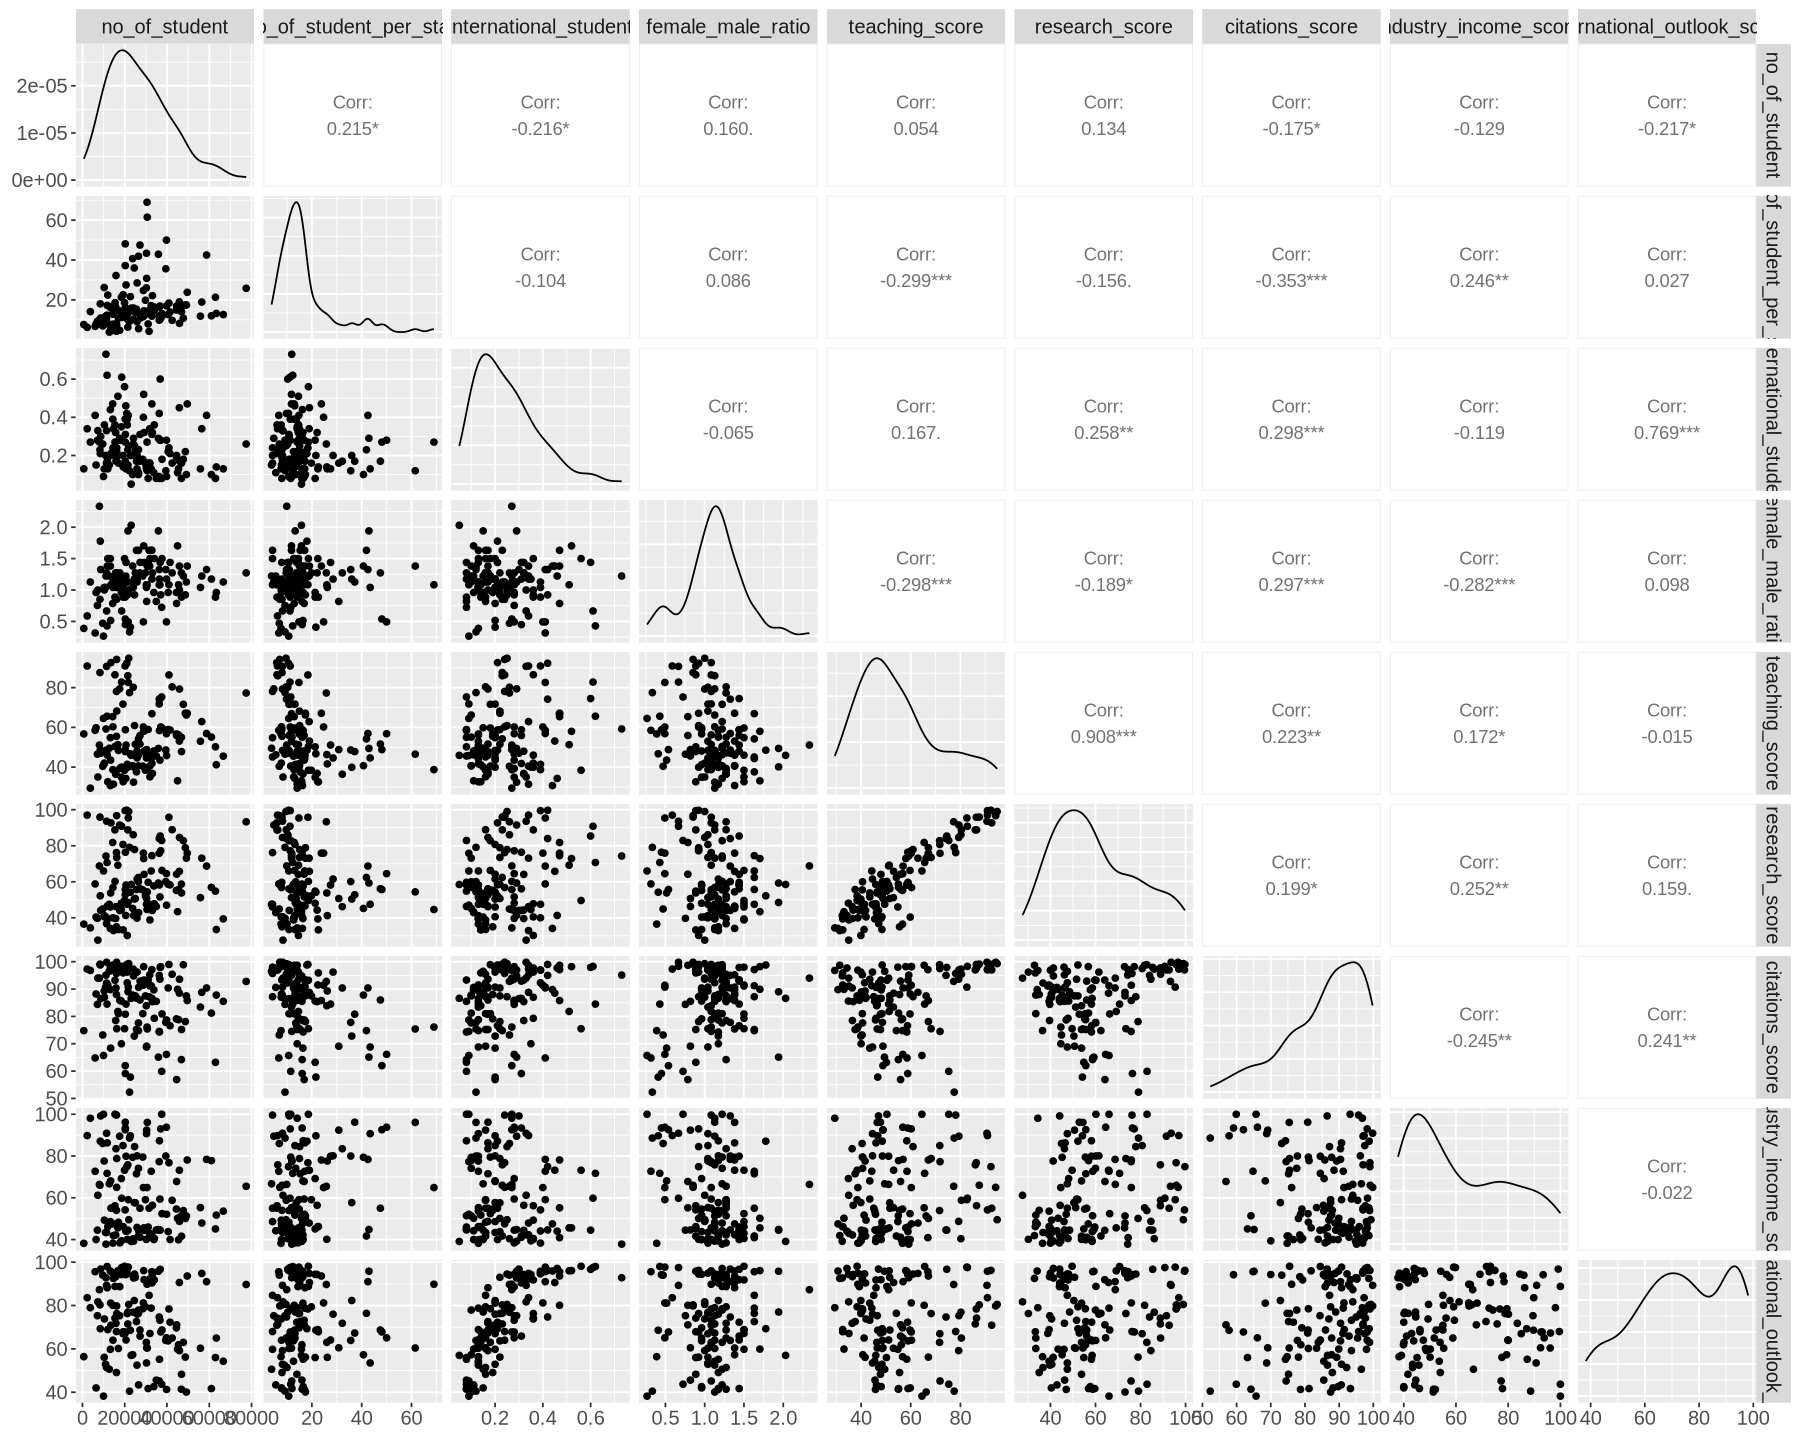

In [6]:
options(repr.plot.width = 15, repr.plot.height = 12) 
university_data_pair_plot <- university_data_cleaned |>
select(- overall_score, - university_rank, - name_of_university, - location) |>
ggpairs(progress = FALSE) +
    theme(text = element_text(size = 15))

university_data_pair_plot

The plot above allows us to explore the relationship between different potential input variables in the data. In particular, identifying the correlation between input variables will help us determine whether multicollinearity exists and could cause problems in our exploration. Specifically for the question, the plot above will help us get a better understanding of how to fit the regression model. If the plot shows that female to male ratio is highly correlated to other potential input variables, it gives us a clearer picture of whether this choice of variable will create an effective model or if we need to to select other variables when fitting the model.

### Methods and Plan

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. You do not need to run the model and present results at this stage. Just a high-level thinking of what model you are planning to use. 

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?

Since the question that is being addressed includes one explanatory variable and its impact on a continuous response variable, a simple linear regression model will be appropriate. Using a simple linear regression will help us clearly identify the effect of the variable (female to male ratio) on the response (overall score) which is the main objective of the question being addressed. However, to use this model, we must assume that both explanatory variables have linear associations with the response, the variance of the residuals are equal, the sample is random and that multicollinearity does not exist. By the looks of the pair plot above, multicollinearity does not exist between the two explanatory variables, but we still must verify the VIF and also verify that they have linear reltionships with the response. If these two key assummptions are not met, it could lead to misleading estimates that would lead to faulty conclusions, making it a weakness of the multiple linear regression model.